In [1]:
#import packages

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns; sns.set(style="ticks", context = "paper", font = "Arial", font_scale = 1.9,
                               palette='colorblind', color_codes = True,
                               rc = {"font.size":7,
                                     "xtick.major.size": 2,
                                     "ytick.major.size": 2})
import warnings
warnings.filterwarnings('ignore')

In [2]:
# sum cfos density/vol

def sum_cfos_density (genotype, st_pattern):
    """formation of reference_list of all sample in a particular genotype"""

    structure_path = "quantification/"+ genotype+"/"+st_pattern
    column_name = []
    sum_L_all = []
    sum_R_all = []

    for root, dirs, files in os.walk (structure_path):
        for file in files:
            if file.endswith ("rre_cfos_L_summary.csv"):#data will be avaiable after publication
                file_l_path = os.path.join(root, "rre_cfos_L_summary.csv")
                folder_path = os.path.dirname(file_l_path)
                path,folder_name = os.path.split(folder_path)
                column_name.append (folder_name)
                YFP_L = pd.read_csv (file_l_path, index_col = 0)
                YFP_sum_L = []
                file_al_path = os.path.join(root, "rre_area_L_summary.csv")#data will be avaiable after publication
                area_L = (pd.read_csv (file_al_path, index_col = 0))*(1.76**2)/1000000
                total_YFP_L = YFP_L*area_L

                for index_l, vara_l in total_YFP_L.iterrows():
                    sum_l = sum (total_YFP_L[total_YFP_L >=0].loc[index_l].dropna().values)
                    sum_area_l = sum (area_L[area_L >= 0].loc[index_l].dropna().values)*0.06
                    if sum_area_l >0:
                        YFP_mean_l = sum_l/sum_area_l
                    else:
                        YFP_mean_l=np.nan
                    YFP_sum_L.append (YFP_mean_l)
                sum_L_all.append(YFP_sum_L)

                YFP_R = pd.read_csv (os.path.join(root, "rre_cfos_R_summary.csv"), index_col = 0)#data will be avaiable after publication
                YFP_sum_R = []
                file_ar_path = os.path.join(root, "rre_area_R_summary.csv")#data will be avaiable after publication
                area_R = (pd.read_csv (file_ar_path, index_col = 0))*(1.76**2)/1000000
                total_YFP_R = YFP_R*area_R

                for index_r, vara_r in total_YFP_R.iterrows():
                    sum_r = sum (total_YFP_R[total_YFP_R >=0].loc[index_r].dropna().values)
                    sum_area_r = sum (area_R[area_R >= 0].loc[index_r].dropna().values)*0.06
                    if sum_area_r >0:
                        YFP_mean_r = sum_r/sum_area_r
                    else:
                        YFP_mean_r = np.nan                        
                    YFP_sum_R.append (YFP_mean_r)
                sum_R_all.append(YFP_sum_R)

    pd_YFP_l = pd.DataFrame (data = np.transpose (sum_L_all), index = total_YFP_L.index, columns = column_name)
    pd_YFP_r = pd.DataFrame (data = np.transpose (sum_R_all), index = total_YFP_R.index, columns = column_name)

    return (pd_YFP_l, pd_YFP_r)
 
W_cfos_L_ctrl, W_cfos_R_ctrl = sum_cfos_density ("WT", "ctrl")
W_cfos_L_TBS, W_cfos_R_TBS = sum_cfos_density ("WT", "TBS")
T_cfos_L_ctrl, T_cfos_R_ctrl = sum_cfos_density ("Tbr1", "ctrl")
T_cfos_L_TBS, T_cfos_R_TBS = sum_cfos_density ("Tbr1", "TBS")

W_cfos_L_TBS_raw = W_cfos_L_TBS.dropna().copy()
W_cfos_R_TBS_raw = W_cfos_R_TBS.dropna().copy()
W_cfos_L_ctrl_raw = W_cfos_L_ctrl.dropna().copy()
W_cfos_R_ctrl_raw = W_cfos_R_ctrl.dropna().copy()

T_cfos_L_TBS_raw = T_cfos_L_TBS.dropna().copy()
T_cfos_R_TBS_raw = T_cfos_R_TBS.dropna().copy()
T_cfos_L_ctrl_raw = T_cfos_L_ctrl.dropna().copy()
T_cfos_R_ctrl_raw = T_cfos_R_ctrl.dropna().copy()

W_cfos_L_TBS_raw["average"] = W_cfos_L_TBS_raw[W_cfos_L_TBS_raw>=0].mean(axis = 1)
W_cfos_R_TBS_raw["average"] = W_cfos_R_TBS_raw[W_cfos_R_TBS_raw>=0].mean(axis = 1)
W_cfos_L_ctrl_raw["average"] = W_cfos_L_ctrl_raw[W_cfos_L_ctrl_raw>=0].mean(axis = 1)
W_cfos_R_ctrl_raw["average"] = W_cfos_R_ctrl_raw[W_cfos_R_ctrl_raw>=0].mean(axis = 1)

T_cfos_L_TBS_raw["average"] = T_cfos_L_TBS_raw[T_cfos_L_TBS_raw>=0].mean(axis = 1)
T_cfos_R_TBS_raw["average"] = T_cfos_R_TBS_raw[T_cfos_R_TBS_raw>=0].mean(axis = 1)
T_cfos_L_ctrl_raw["average"] = T_cfos_L_ctrl_raw[T_cfos_L_ctrl_raw>=0].mean(axis = 1)
T_cfos_R_ctrl_raw["average"] = T_cfos_R_ctrl_raw[T_cfos_R_ctrl_raw>=0].mean(axis = 1)

average_sum_L = W_cfos_L_TBS_raw["average"]+W_cfos_L_ctrl_raw["average"]+T_cfos_L_TBS_raw["average"]+T_cfos_L_ctrl_raw["average"]
average_sum_R = W_cfos_R_TBS_raw["average"]+W_cfos_R_ctrl_raw["average"]+T_cfos_R_TBS_raw["average"]+T_cfos_R_ctrl_raw["average"]

#filter structure based on cfos average sum density of 4 conditions
cfos_structure_L = average_sum_L[average_sum_L>=800].index.tolist()
cfos_structure_R = average_sum_R[average_sum_R>=800].index.tolist()


#normalize to WT ctrl average cfos signal
W_cfos_L_ctrl["average"]= W_cfos_L_ctrl[W_cfos_L_ctrl >= 0].mean(axis = 1)
W_cfos_R_ctrl["average"]= W_cfos_R_ctrl[W_cfos_R_ctrl >= 0].mean(axis = 1)
W_cfos_L_TBS["WT nost average"]= W_cfos_L_ctrl[W_cfos_L_ctrl >= 0].mean(axis = 1)
W_cfos_R_TBS["WT nost average"]= W_cfos_R_ctrl[W_cfos_R_ctrl >= 0].mean(axis = 1)
T_cfos_L_TBS["WT nost average"] = W_cfos_L_ctrl[W_cfos_L_ctrl >= 0].mean(axis = 1)
T_cfos_L_ctrl["WT nost average"] = W_cfos_L_ctrl[W_cfos_L_ctrl >= 0].mean(axis = 1)
T_cfos_R_TBS["WT nost average"] = W_cfos_R_ctrl[W_cfos_L_ctrl >= 0].mean(axis = 1)
T_cfos_R_ctrl["WT nost average"] = W_cfos_R_ctrl[W_cfos_L_ctrl >= 0].mean(axis = 1)

for indexg, varag in W_cfos_L_TBS.iterrows():
    
    W_cfos_L_TBS.loc[indexg] = (W_cfos_L_TBS.loc[indexg] / W_cfos_L_ctrl["average"].loc[indexg])*100
    W_cfos_L_ctrl.loc[indexg] = (W_cfos_L_ctrl.loc[indexg] / W_cfos_L_ctrl["average"].loc[indexg])*100
    W_cfos_R_TBS.loc[indexg] = (W_cfos_R_TBS.loc[indexg] / W_cfos_R_ctrl["average"].loc[indexg])*100
    W_cfos_R_ctrl.loc[indexg] = (W_cfos_R_ctrl.loc[indexg] / W_cfos_R_ctrl["average"].loc[indexg])*100
    
for indexh, varah in T_cfos_L_TBS.iterrows():
    T_cfos_L_TBS.loc[indexh] = (T_cfos_L_TBS.loc[indexh] / T_cfos_L_TBS["WT nost average"].loc[indexh])*100
    T_cfos_L_ctrl.loc[indexh] = (T_cfos_L_ctrl.loc[indexh] / T_cfos_L_ctrl["WT nost average"].loc[indexh])*100
    T_cfos_R_TBS.loc[indexh] = (T_cfos_R_TBS.loc[indexh] /T_cfos_R_TBS["WT nost average"].loc[indexh])*100
    T_cfos_R_ctrl.loc[indexh] = (T_cfos_R_ctrl.loc[indexh] / T_cfos_R_ctrl["WT nost average"].loc[indexh])*100


W_cfos_L_TBS_re=W_cfos_L_TBS.loc[cfos_structure_L].T[:-1]
W_cfos_R_TBS_re=W_cfos_R_TBS.loc[cfos_structure_R].T[:-1]
W_cfos_L_ctrl_re=W_cfos_L_ctrl.loc[cfos_structure_L].T[:-1]
W_cfos_R_ctrl_re=W_cfos_R_ctrl.loc[cfos_structure_R].T[:-1]
T_cfos_L_TBS_re=T_cfos_L_TBS.loc[cfos_structure_L].T[:-1]
T_cfos_R_TBS_re=T_cfos_R_TBS.loc[cfos_structure_R].T[:-1]
T_cfos_L_ctrl_re=T_cfos_L_ctrl.loc[cfos_structure_L].T[:-1]
T_cfos_R_ctrl_re=T_cfos_R_ctrl.loc[cfos_structure_R].T[:-1]

In [3]:
#subset brain regions for analysis

W_cfos_L_TBS_re["Group"] = "WT_TBS"
W_cfos_R_TBS_re["Group"] = "WT_TBS"
W_cfos_L_ctrl_re["Group"] = "WT_ctrl"
W_cfos_R_ctrl_re["Group"] = "WT_ctrl"
T_cfos_L_TBS_re["Group"] = "Tbr1_TBS"
T_cfos_R_TBS_re["Group"] = "Tbr1_TBS"
T_cfos_L_ctrl_re["Group"] = "Tbr1_ctrl"
T_cfos_R_ctrl_re["Group"] = "Tbr1_ctrl"

cfos_L = pd.concat([W_cfos_L_ctrl_re, T_cfos_L_ctrl_re, W_cfos_L_TBS_re, T_cfos_L_TBS_re])
cfos_R = pd.concat([W_cfos_R_ctrl_re, T_cfos_R_ctrl_re, W_cfos_R_TBS_re, T_cfos_R_TBS_re])

#subset brain regions
structure_list_parent_v1 = pd.read_csv ("CCFv3/structuretree/structure_list_paper_cfos.csv", index_col = 0)

def subseting_structure_cfos_group (pd, structure_list):
    """subseting parent or offspring brain structures"""
    pd_sub = pd[[a for a in  structure_list.LABEL.values if a in pd.columns]]
    pd_sub["Group"] = pd["Group"]

    return pd_sub

parent_cfos_L = subseting_structure_cfos_group(cfos_L, structure_list_parent_v1)
parent_cfos_R = subseting_structure_cfos_group(cfos_R, structure_list_parent_v1)

In [6]:
#statistic analysis of cfos density 
def kruskal_Wallis_cfos (pd_data):
    """non-parametric multiple comparison followed by post-hoc test"""
    
    WT_ctrl  = pd_data[pd_data["Group"]=="WT_ctrl"].iloc[:,:-1]
    Tbr1_ctrl  = pd_data[pd_data["Group"]=="Tbr1_ctrl"].iloc[:,:-1]
    WT_TBS  = pd_data[pd_data["Group"]=="WT_TBS"].iloc[:,:-1]
    Tbr1_TBS  = pd_data[pd_data["Group"]=="Tbr1_TBS"].iloc[:,:-1]
    Kruskal_wallis_statistic =[]
    kruskal_result_P_value = []
    column_list = []  
    post_hoc_Tbr1_WT_ctrl_P_list =[]
    post_hoc_WT_WT_TBS_P_list =[]
    post_hoc_Tbr1_Tbr1_TBS_P_list =[]
    post_hoc_Tbr1_WT_TBS_P_list =[]
       
    for a in WT_ctrl.columns:
        kruskal_result = stats.kruskal(WT_ctrl[a], Tbr1_ctrl[a], WT_TBS[a], Tbr1_TBS[a])
        Kruskal_wallis_statistic.append(kruskal_result[0])
        kruskal_result_P_value.append (kruskal_result[1])
        column_list.append (a)
       
        if kruskal_result[1] <0.05:
            post_hoc_list = [WT_ctrl[a], Tbr1_ctrl[a], WT_TBS[a], Tbr1_TBS[a]]
            post_hoc = sp.posthoc_dunn (post_hoc_list, p_adjust = "bonferroni")
            post_hoc_Tbr1_WT_ctrl_P = post_hoc.loc[1,2]
            post_hoc_WT_WT_TBS_P = post_hoc.loc[1,3]
            post_hoc_Tbr1_Tbr1_TBS_P = post_hoc.loc[2,2]
            post_hoc_Tbr1_WT_TBS_P = post_hoc.loc[3,4]
            
        else:
            post_hoc_Tbr1_WT_ctrl_P = np.nan
            post_hoc_WT_WT_TBS_P = np.nan
            post_hoc_Tbr1_Tbr1_TBS_P = np.nan
            post_hoc_Tbr1_WT_TBS_P = np.nan
        
        post_hoc_Tbr1_WT_ctrl_P_list.append (post_hoc_Tbr1_WT_ctrl_P)
        post_hoc_WT_WT_TBS_P_list.append (post_hoc_WT_WT_TBS_P)
        post_hoc_Tbr1_Tbr1_TBS_P_list.append (post_hoc_Tbr1_Tbr1_TBS_P)
        post_hoc_Tbr1_WT_TBS_P_list.append (post_hoc_Tbr1_WT_TBS_P)
              
    pd_multiple_comparison = pd.DataFrame ({"Kruskal_wallis_statistic": Kruskal_wallis_statistic,
                                            "Kruskal_wallis_P_value": kruskal_result_P_value,
                                            "post_hoc_Tbr1_ctrl_vs.WT_ctrl_P_value":post_hoc_Tbr1_WT_ctrl_P_list,
                                            "post_hoc_WT_TBS_vs.WT_ctrl_P_value":post_hoc_WT_WT_TBS_P_list,
                                            "post_hoc_Tbr1_TBS_vs.Tbr1_ctrl_P_value":post_hoc_Tbr1_Tbr1_TBS_P_list,
                                            "post_hoc_Tbr1_TBS_vs.WT_TBS_P_value":post_hoc_Tbr1_WT_TBS_P_list},
                                           index = column_list)
    return pd_multiple_comparison

multiple_comparison_cfos_L = kruskal_Wallis_cfos(parent_cfos_L)
multiple_comparison_cfos_R = kruskal_Wallis_cfos(parent_cfos_R)

In [11]:
#list of brain regions with significant difference of relative C-FOS density (contralateral brain regions)
multiple_comparison_cfos_L[multiple_comparison_cfos_L["Kruskal_wallis_P_value"]<0.05]

,Kruskal_wallis_statistic,Kruskal_wallis_P_value,post_hoc_Tbr1_ctrl_vs.WT_ctrl_P_value,post_hoc_WT_TBS_vs.WT_ctrl_P_value,post_hoc_Tbr1_TBS_vs.Tbr1_ctrl_P_value,post_hoc_Tbr1_TBS_vs.WT_TBS_P_value
PCN,9.304187,0.025508,0.074472,1.0,1.0,0.744257


In [12]:
#list of brain regions with significant difference of relative C-FOS density (ipsilateral brain regions)
multiple_comparison_cfos_R[multiple_comparison_cfos_R["Kruskal_wallis_P_value"]<0.05]

,Kruskal_wallis_statistic,Kruskal_wallis_P_value,post_hoc_Tbr1_ctrl_vs.WT_ctrl_P_value,post_hoc_WT_TBS_vs.WT_ctrl_P_value,post_hoc_Tbr1_TBS_vs.Tbr1_ctrl_P_value,post_hoc_Tbr1_TBS_vs.WT_TBS_P_value
PCN,8.247291,0.041168,0.064100,0.131662,1.0,1.000000
SubG,9.375369,0.024695,0.164978,1.000000,1.0,0.212788
VTA,8.052956,0.044930,0.101989,0.072222,1.0,1.000000
LT,8.973399,0.029647,0.334765,1.000000,1.0,0.168047


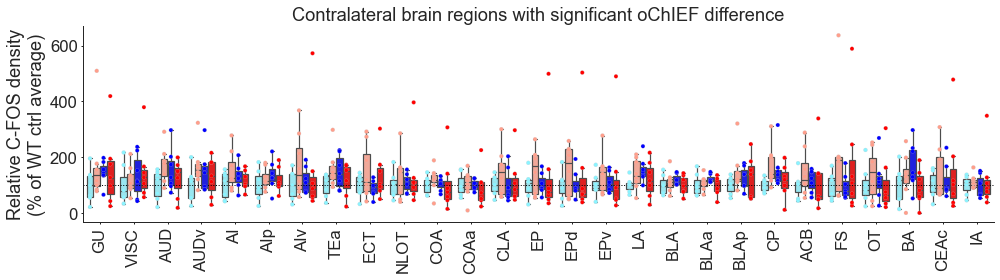

In [25]:
#plot volume-based quantification of relative C-FOS density in affected BLA projection regions (Figure s6a upper panel)

volume_based_analysis = pd.read_csv("table_s1.csv", index_col=0)

contra_oChIEF_list = volume_based_analysis[volume_based_analysis["Contra. volume-based analysis oChIEF U test P value"]<0.05].index.tolist()

contra_oChIEF_list_cfos = [s for s in structure_list_parent_v1.LABEL if (s in contra_oChIEF_list)&(s in parent_cfos_L.columns)]

U_parent_cfos_L =  parent_cfos_L[contra_oChIEF_list_cfos]
U_parent_cfos_L["Group"]=parent_cfos_L["Group"]

U_parent_cfos_L_m = pd.melt (U_parent_cfos_L, ["Group"],
                                           var_name = "Structure",
                                           value_name = "Relative C-FOS density""<br>""(% of WT ctrl average)")

plt.figure (figsize = (14,4))
sns.stripplot (y = "Relative C-FOS density""<br>""(% of WT ctrl average)", 
               x = "Structure", 
               hue = "Group",
               size = 4,  
               data = U_parent_cfos_L_m,
               palette = ["#8BF3FF", "#FF9E8B", "#0000FF", "#FF0000"],
               dodge=True, jitter = False, linewidth = 0.2, edgecolor = "#C8C8C8")
ax = sns.boxplot (y = "Relative C-FOS density""<br>""(% of WT ctrl average)", 
               x = "Structure", 
               hue = "Group", 
               data = U_parent_cfos_L_m,
               palette = ["#8BF3FF", "#FF9E8B", "#0000FF", "#FF0000"],
               dodge=True, fliersize=0)
ax.axhline(y=100, color='black', linewidth=1, linestyle=':')
ax.set_xticklabels (ax.get_xticklabels(), rotation = "vertical")
ax.set_ylabel ("Relative C-FOS density\n(% of WT ctrl average)")
ax.set_title ("Contralateral brain regions with significant oChIEF difference")
ax.set_xlabel ("")
ax.legend_.remove()
sns.despine()
plt.tight_layout()
plt.show()

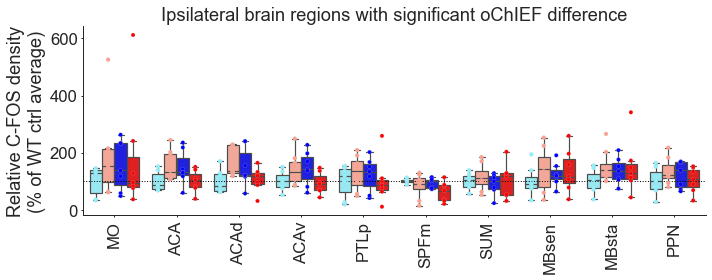

In [26]:
#plot volume-based quantification of relative C-FOS density in affected BLA projection regions (Figure s6a lower panel)

ipsi_oChIEF_list = volume_based_analysis[volume_based_analysis["Ipsi. volume-based analysis oChIEF U test P value"]<0.05].index.tolist()

ipsi_oChIEF_list_cfos = [s for s in structure_list_parent_v1.LABEL if (s in ipsi_oChIEF_list)&(s in parent_cfos_R.columns)]

U_parent_cfos_R =  parent_cfos_R[ipsi_oChIEF_list_cfos]
U_parent_cfos_R["Group"]=parent_cfos_R["Group"]

U_parent_cfos_R_m = pd.melt (U_parent_cfos_R, ["Group"],
                                           var_name = "Structure",
                                           value_name = "Relative C-FOS density""<br>""(% of WT ctrl average)")

plt.figure (figsize = (10,4))
sns.stripplot (y = "Relative C-FOS density""<br>""(% of WT ctrl average)", 
               x = "Structure", 
               hue = "Group",
               size = 4,  
               data = U_parent_cfos_R_m,
               palette = ["#8BF3FF", "#FF9E8B", "#0000FF", "#FF0000"],
               dodge=True, jitter = False, linewidth = 0.2, edgecolor = "#C8C8C8")
ax = sns.boxplot (y = "Relative C-FOS density""<br>""(% of WT ctrl average)", 
               x = "Structure", 
               hue = "Group", 
               data = U_parent_cfos_R_m,
               palette = ["#8BF3FF", "#FF9E8B", "#0000FF", "#FF0000"],
               dodge=True, fliersize=0)
ax.axhline(y=100, color='black', linewidth=1, linestyle=':')
ax.set_xticklabels (ax.get_xticklabels(), rotation = "vertical")
ax.set_ylabel ("Relative C-FOS density\n(% of WT ctrl average)")
ax.set_title ("Ipsilateral brain regions with significant oChIEF difference")
ax.set_xlabel ("")
ax.legend_.remove()
sns.despine()
plt.tight_layout()
plt.show()